# Experiment File 
This file is where most of the models are made and experimented so that we made sure everything works.

In [4]:
import tensorflow as tf

In [5]:
import matplotlib.pyplot as plt

In [6]:
import tensorflow_datasets as tfds

In [7]:
from tensorflow.keras.mixed_precision import experimental as mixed_precision

In [ ]:
# uncomment to use TPU
# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_policy(policy)

In [ ]:
# print('Compute dtype: %s' % policy.compute_dtype)
# print('Variable dtype: %s' % policy.variable_dtype)

In [8]:
IMAGE_SIZE = 224
BATCH_SIZE = 128
SHUFFLE_SIZE = 1000
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Loading dataset and preprocessing it. 
Here I am just trying to train a vanilla convolutional autoencoder on LSUN dining room dataset so that it can learn some features of rooms. More data will be scraped for testing later on 

In [9]:
ds, info = tfds.load('lsun/dining_room', split='train', with_info=True, download=False)

In [10]:
# preprocess the images 
pre_proc = tf.keras.applications.vgg19.preprocess_input
def format_example(image):
    image = image['image']
    image = tf.cast(image, tf.float32)
    # Normalize the pixel values
#     image = image / 255.0
    # Resize the image
#     image = pre_proc(image)
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
#     image = image/255.0
    image = image/255.0
    return image


In [11]:
mapped = ds.map(format_example)

In [12]:
batched_ds = mapped.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

(128, 224, 224, 3)
tf.Tensor(
[[[0.65106416 0.59758025 0.54234564]
  [0.6317752  0.5807948  0.5167955 ]
  [0.649301   0.591983   0.5111357 ]
  ...
  [0.60467947 0.6164442  0.5889932 ]
  [0.5909515  0.59553844 0.5644986 ]
  [0.6378151  0.62496495 0.57790613]]

 [[0.61907136 0.5661239  0.5092799 ]
  [0.59977114 0.54879075 0.48145884]
  [0.61222744 0.5549095  0.47406214]
  ...
  [0.5879014  0.5983081  0.56985545]
  [0.6076702  0.6122572  0.5810747 ]
  [0.6011204  0.58827025 0.5417479 ]]

 [[0.6209184  0.56993794 0.5066864 ]
  [0.6109944  0.5601328  0.48988098]
  [0.6133879  0.5563388  0.4746849 ]
  ...
  [0.56878775 0.5736772  0.5418207 ]
  [0.5421882  0.54781926 0.51238763]
  [0.5524347  0.5390781  0.49604213]]

 ...

 [[0.36475855 0.34907228 0.35299385]
  [0.38940465 0.37371838 0.37763995]
  [0.42292303 0.40723675 0.41115832]
  ...
  [0.46022403 0.39355737 0.33081228]
  [0.46381292 0.3899685  0.32363454]
  [0.4652486  0.38039216 0.3008753 ]]

 [[0.38128513 0.36559886 0.36952043]
  [0.40

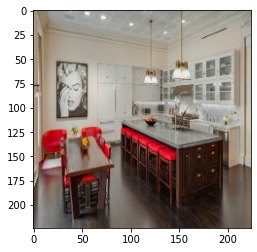

In [13]:
eg_image = None
for image  in batched_ds.take(1):
    print(image.shape)
    print(image[0])
    plt.imshow(image[0])
    eg_image = image[0]

# Also loading VGG19 in preparation for later and just playing around and see if it predicts properly

In [14]:
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')

[('dining_table', 0.18595867),
 ('desk', 0.13507174),
 ('washer', 0.07655573),
 ('restaurant', 0.0508214),
 ('mosquito_net', 0.048769936)]

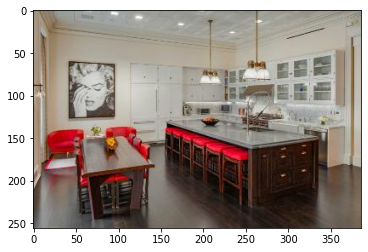

In [13]:
eg_image = None
for data in ds.take(1):
    img = data['image']
    plt.imshow(img)
    img = tf.cast(img, tf.float32)

    pp_result = pre_proc(img)
    x = tf.image.resize(pp_result, (224, 224))
#     print(x)
    x = tf.expand_dims(x, axis=0)
    eg_image = x
    pred_probs = vgg(x)
    predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(pred_probs.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]
#     print(pred_probs)
    

['image']
(256, 386, 3)
['image']
(256, 384, 3)
['image']
(256, 384, 3)


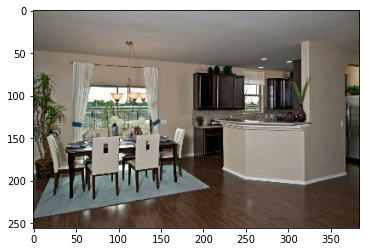

In [15]:
for example in ds.take(3):
    print(list(example.keys()))
    image = example["image"]
    print(image.shape)
    plt.imshow(image)

# Some code for image augmentation that we might use later

In [16]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#     tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

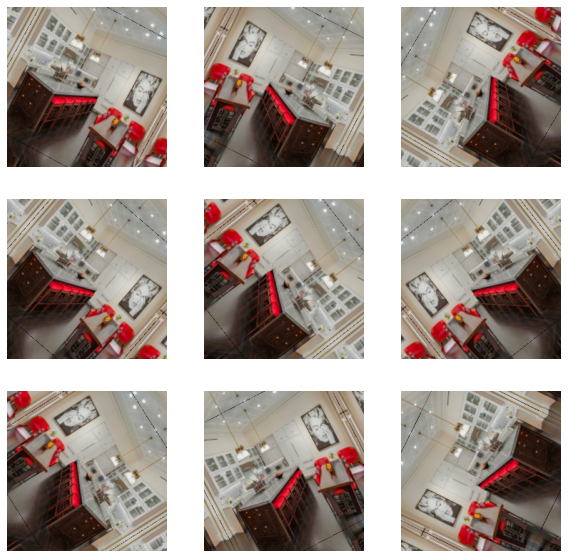

In [17]:
first_img = None
for image in ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image['image']
    first_img = first_image
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

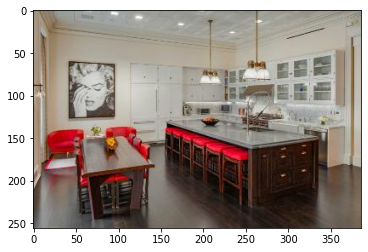

In [18]:
plt.imshow(first_img)

# Lets look at the architecture of vGG 19

In [15]:
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')

print()
for layer in vgg.layers:
    print(layer.name)
print(vgg.summary())


input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool
flatten
fc1
fc2
predictions
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D

# define the style layers for later use

In [16]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [17]:
def vgg_layers(layer_names):
    """ Creates a vgg model that returns a list of intermediate output values."""
    # Load our model. Load pretrained VGG, trained on imagenet data
    vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_names]

    model = tf.keras.Model([vgg.input], outputs)
    return model

In [18]:
def custom_layer(layer_name):
    """ Creates a vgg model that returns an intermediate output value."""
    # Load our model. Load pretrained VGG, trained on imagenet data, include_top=true so that we have the sizes
    vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
    vgg.trainable = False

    outputs = vgg.get_layer(layer_name).output

    model = tf.keras.Model([vgg.input], outputs)
    return model

In [19]:
style_extractor = vgg_layers(style_layers)

In [23]:
style_outputs = style_extractor(eg_image)


In [25]:
middle_cut = custom_layer("block5_conv1")

In [14]:
[x.shape for x in style_extractor(eg_image)]

NameError: name 'eg_image' is not defined

In [25]:
for name, output in zip(style_layers, style_outputs):
    print(name)
    print("  shape: ", output.numpy().shape)
    print("  min: ", output.numpy().min())
    print("  max: ", output.numpy().max())
    print("  mean: ", output.numpy().mean())
    print()

block1_conv1
  shape:  (1, 224, 224, 64)
  min:  0.0
  max:  523.4166
  mean:  16.553009

block2_conv1
  shape:  (1, 112, 112, 128)
  min:  0.0
  max:  3270.5022
  mean:  105.22676

block3_conv1
  shape:  (1, 56, 56, 256)
  min:  0.0
  max:  7479.1274
  mean:  121.34112

block4_conv1
  shape:  (1, 28, 28, 512)
  min:  0.0
  max:  12944.151
  mean:  488.06137

block5_conv1
  shape:  (1, 14, 14, 512)
  min:  0.0
  max:  2455.2544
  mean:  49.670914



In [20]:
# this calculates the gram matrix of the input tensor, from the tensorflow neural style transfer tutorial from https://www.tensorflow.org/tutorials/generative/style_transfer

def gram_matrix(input_tensor):
    tf.cast(input_tensor, tf.float32)
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)

In [21]:
style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

In [22]:
for name, output in zip(style_layers, style_outputs):
    print(name)
    print("  shape: ", output.numpy().shape)
    print("  min: ", output.numpy().min())
    print("  max: ", output.numpy().max())
    print("  mean: ", output.numpy().mean())
    print()

block1_conv1
  shape:  (1, 64, 64)
  min:  0.0419174
  max:  17139.799
  mean:  393.59344

block2_conv1
  shape:  (1, 128, 128)
  min:  0.0
  max:  100286.125
  mean:  14389.699

block3_conv1
  shape:  (1, 256, 256)
  min:  0.0
  max:  603600.2
  mean:  18658.064

block4_conv1
  shape:  (1, 512, 512)
  min:  0.0
  max:  5537305.5
  mean:  262226.75

block5_conv1
  shape:  (1, 512, 512)
  min:  0.0
  max:  232260.92
  mean:  2647.087



In [21]:
# def style_loss(style_outputs, style_targets):
#     style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
#                            for name in style_outputs.keys()])

# Here we implement the variational autoencoder
Implementation framework borrowed from 
https://blog.keras.io/building-autoencoders-in-keras.html

# VAE in short
At this point, the found out that the vanilla autoencoder does not really work all that well. We think it might be due to our latent space being not very well
structured (so that the autoencoder maps a sample it hasn't seen before to a random place on the latent space). The reconstruction is bad and the space doesn't make a whole lot of sense. We therefore want to kind of smooth out the latent space.
Without getting too much into details, variational autoencoder embeds a sample as a mean and variance pair. We can then sample from the given mean and variance to obtain our embedding. This has the benefit of smoothing out a latent space as by modeling our sample as a distribution

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

# Sampling layer

In [23]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        z_mean = tf.cast(z_mean, tf.float32)
        z_log_var = tf.cast(z_log_var, tf.float32)
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
# class extract_style_and_flatten(layers.Layer):
    
#     def call(self, inputs):
#         for layer in 

# Encoder


In [24]:
latent_dim = 300


encoder_inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE,3))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(128, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(256, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(512, 3, activation="relu", strides=2, padding="same")(x)
# x= middle_cut(encoder_inputs)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu", dtype="float32")(x)
z_mean = layers.Dense(latent_dim, name="z_mean", dtype="float32")(x)

# someone on the internet said if u initialize this to all 0s you can avoid exploding gradient
z_log_var = layers.Dense(latent_dim, name="z_log_var", kernel_initializer='zeros',dtype="float32")(x)
z = Sampling()((z_mean, z_log_var))
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 56, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 128)  73856       conv2d_1[0][0]                   
____________________________________________________________________________________________

# Decoder

In [25]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 512, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 512))(x)
x = layers.Conv2DTranspose(512, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(256, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)


decoder_outputs = layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same", dtype="float32")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 25088)             7551488   
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 512)       2359808   
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 256)       1179904   
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 56, 56, 128)       295040    
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 112, 112, 64)      7379

# Putting it all together

In [145]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
            data = layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE)
            print(data.shape)
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = encoder(data)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 224 * 224
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

In [146]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())


In [139]:
# Uncomment to train. DO NOT UNCOMMENT if you have the checkpoint as it will take 2 nights to go through all of the LSUN/living room data
# vae.fit(batched_ds, batched_ds, epochs=10)

# I already trained this model so lets just load the checkpoint weights

In [147]:
vae.load_weights("chkpt4")

## Lets see if it can reconstruct some images

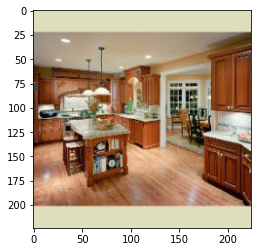

In [29]:
eg = None
for image in batched_ds.take(4):
    plt.imshow(image[0])
    eg = image[0]

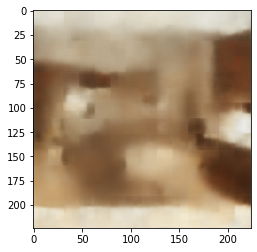

In [30]:
plt.imshow(vae.decoder(vae.encoder(tf.expand_dims(eg, axis=0))[2])[0])

In [83]:
# vae.save_weights("chkpt2")

In [31]:
import numpy as np

In [32]:
a = vae.encoder(tf.expand_dims(eg, axis=0))[2]

In [33]:
b = vae.encoder(tf.expand_dims(eg, axis=0))[2]

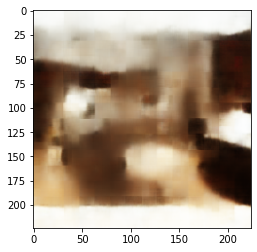

In [34]:
plt.imshow(vae.decoder(2*a)[0])

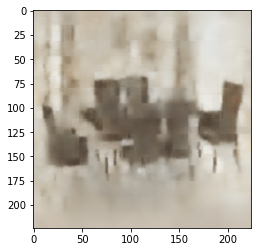

In [154]:
plt.imshow(vae.decoder(0*a+1*b)[0])

# Looks like our vae works decently well, lets make the feature extractor and compare them later
Here we are just using keras' functional api to chain together our style extractor layer with gram matrix and flattening layers

In [37]:
inputs = keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE,3))
styleoutputs = style_extractor(inputs)
styleoutputs = [gram_matrix(style) for style in styleoutputs]
styleoutputs = [tf.keras.layers.Flatten()(style) for style in styleoutputs]
result = tf.concat(styleoutputs, axis = 1)
extractor = keras.Model(inputs, result, name="style_extract")

In [38]:
extractor.summary()

Model: "style_extract"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       [(None, 224, 224, 64 12944960    input_6[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_Shape (TensorFlowOp [(4,)]               0           functional_1[0][0]               
__________________________________________________________________________________________________
tf_op_layer_Shape_1 (TensorFlow [(4,)]               0           functional_1[0][1]               
______________________________________________________________________________________

# These data are scrapped from pinterest and are not that comprehensive. More comprehensive testing will come later where we used Flickr's API where it is much easier to obtain better quality data
Here it is just to test out if it somehow works

In [59]:
from bs4 import BeautifulSoup

import requests
import urllib.request
import shutil
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds


In [60]:
url_front = "https://www.istockphoto.com/photos/living-room?istockcollection=&mediatype=photography&page="
url_end = "&phrase=living%20room&sort=mostpopular"
image_info = []
for i in range(10):
  url = url_front  +str(i)+url_end
  response = requests.get(url)

  soup = BeautifulSoup(response.text, "html.parser")

  aas = soup.find_all("img", class_='gallery-asset__thumb gallery-mosaic-asset__thumb')
  # print(aas)
  for a in aas:
      # image_tag = a.findChildren("img")
      # print(a["src"])
      # print(image_tag[0]['src'])
      image_info.append(a["src"])

print(len(image_info))


540


In [67]:
def download_image(image,i):
    response = requests.get(image, stream=True)
    realname = "interior"+str(i)
    
    file = open("./content/interior_pic/img/{}.jpg".format(realname), 'wb')
    
    response.raw.decode_content = True
    shutil.copyfileobj(response.raw, file)
    del response

In [68]:
!mkdir ./content/interior_pic
!mkdir ./content/interior_pic/img

mkdir: cannot create directory ‘./content/interior_pic’: File exists
mkdir: cannot create directory ‘./content/interior_pic/img’: File exists


In [69]:
for i in range(0, 500):
    download_image(image_info[i],i)

In [43]:
data_dir = "./content/interior_pic"
batch_size = 32
img_height = IMAGE_SIZE
img_width = IMAGE_SIZE
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=500)

Found 508 files belonging to 1 classes.
Using 407 files for training.


In [44]:

for image_batch, labels_batch in train_ds:
  train_image = image_batch
  print(train_image.shape)
  print(labels_batch.shape)
  break

train_image = train_image.numpy().astype('float32') / 255.


(407, 224, 224, 3)
(407,)


# Show some scrapped images
Here modern interiors are just scraped and store in train and the japanese ones stored in test. They aren't actually train and test but was just named that way 

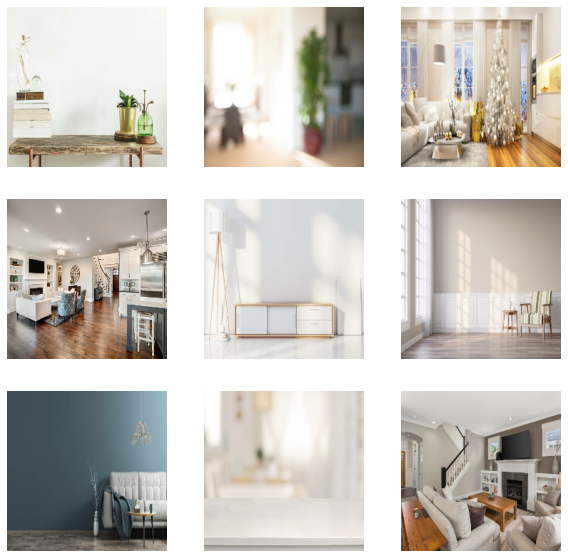

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(train_image[i])
  plt.axis("off")

# Scrape some japanese interiors

In [46]:
url_front = "https://www.pinterest.jp/amp/nahos0207/和モダン"
# url_end = "&phrase=living%20room&sort=mostpopular"
Jap_image_info = []
# for i in range(10):
url = url_front  +str(i)+url_end
response = requests.get(url_front)

soup = BeautifulSoup(response.text, "html.parser")

aas = soup.find_all("amp-img", class_='_1xgacdm')
# print(aas)
for a in aas:
    # image_tag = a.findChildren("img")
    # print(a["src"])
    # print(image_tag[0]['src'])
    Jap_image_info.append(a["src"])

print(len(Jap_image_info))

NameError: name 'url_end' is not defined

In [206]:
def download_Jap_image(image,i):
    response = requests.get(image, stream=True)
    realname = "interior"+str(i)
    
    file = open("./content/interior_pic_jap/img/{}.jpg".format(realname), 'wb')
    
    response.raw.decode_content = True
    shutil.copyfileobj(response.raw, file)
    del response

In [207]:
!mkdir ./content/interior_pic_jap
!mkdir ./content/interior_pic_jap/img

mkdir: cannot create directory ‘./content/interior_pic_jap’: File exists
mkdir: cannot create directory ‘./content/interior_pic_jap/img’: File exists


In [208]:

for i in range(0, 50):
    download_Jap_image(Jap_image_info[i],i)

In [47]:
data_dir_jap = "./content/interior_pic_jap"
batch_size = 32
img_height = IMAGE_SIZE
img_width = IMAGE_SIZE
test_jap = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_jap,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=57)

Found 65 files belonging to 1 classes.
Using 59 files for training.


In [48]:
for image_batch, labels_batch in test_jap:
  test_image = image_batch
  print(test_image.shape)
  # print(labels_batch.shape)
  break

test_image = test_image.numpy().astype('float32') / 255.

(57, 224, 224, 3)


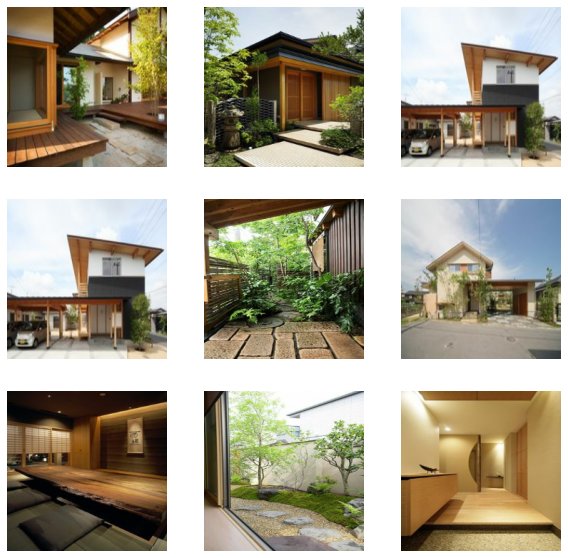

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(test_image[i])
  plt.axis("off")

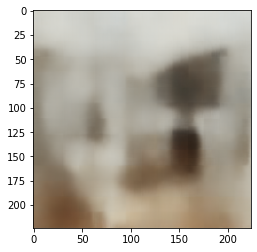

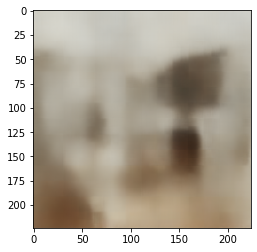

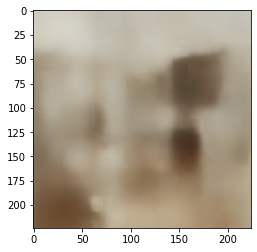

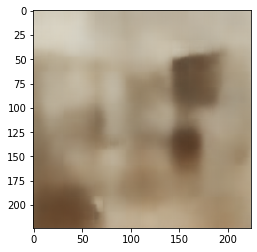

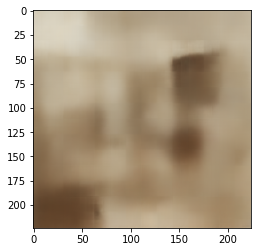

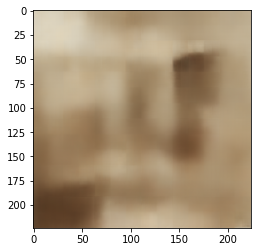

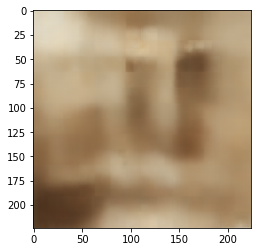

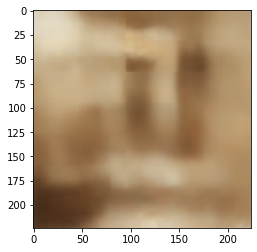

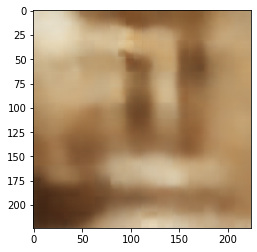

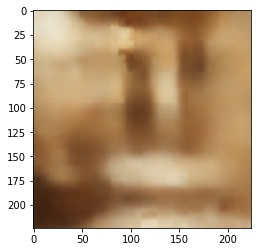

In [93]:
for a in np.linspace(0,1,10):
    plt.imshow(vae.decoder(vae.encoder(tf.expand_dims(a*test_image[8] + (1-a) * train_image[8], axis=0))[2])[0])
    plt.show()

## see if VAE reproduces some images
This is a modern interior's image, image 9 from modern images

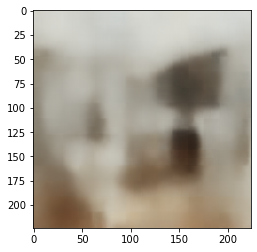

In [48]:
plt.imshow(vae.decoder(vae.encoder(tf.expand_dims(train_image[8], axis=0))[2])[0])

In [94]:
western_interiors = train_image[:50]

In [95]:
japanese_interiors = test_image

In [96]:
western_embedding = []
for w_interior in western_interiors:
    western_embedding.append(vae.encoder(tf.expand_dims(w_interior, axis=0))[0].numpy().flatten())

In [97]:
labels = [0] * len(western_embedding)

In [98]:
japanese_embedding = []
for j_interior in japanese_interiors:
    japanese_embedding.append(vae.encoder(tf.expand_dims(j_interior, axis=0))[0].numpy().flatten())


In [99]:
labels.extend([1] * len(japanese_embedding))

In [100]:
labels = np.array(labels)

In [101]:
all_embedding = western_embedding + japanese_embedding

In [102]:
all_embedding = np.array(all_embedding)

In [103]:
all_embedding.shape

(107, 300)

Use tsne to see if the rooms are different stylewise

In [24]:
from sklearn.manifold import TSNE

In [105]:
visualized = TSNE(n_components=2, n_iter=1000).fit_transform(all_embedding)

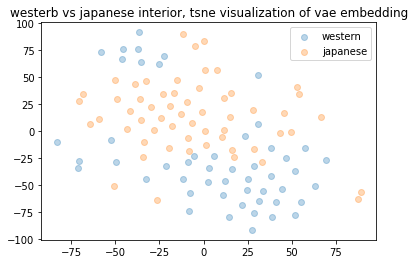

In [108]:
plt.title("westerb vs japanese interior, tsne visualization of vae embedding")
plt.scatter(visualized[labels==0][:,0], visualized[labels==0][:,1], label="western", alpha=0.3)
plt.scatter(visualized[labels==1][:,0], visualized[labels==1][:,1], label="japanese", alpha = 0.3)
plt.legend()

## They do seem different somewhat, which is good
Here is basically a quick and dirty quick comparion of the two embeddings from vae and style extractor with PCA and TSNE. they both seem to separate the different styles somewhat, so the result will have to be more carefully tested. For the full testing, see main notebook. Basically vae actually doesn't do that well and the style extractor does a lot better

In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np
import glob

In [144]:
def get_embedding_vae(vae, data, labels):
    embeddings = []
    for interior in data:
        embeddings.append(vae.encoder(tf.expand_dims(interior, axis=0))[0].numpy().flatten())
    # Since the first step of TSNE is PCA anyways we know we have a relatively good dataset if the PCA result looks good
    visualized = TSNE(n_components=2, n_iter=1000).fit_transform(embeddings)
    plt.title("western vs japanese interior, tsne visualization of vae embedding")
    for label in np.unique(labels):
        plt.scatter(visualized[labels==label][:,0], visualized[labels==label][:,1], label=label, alpha=0.3)
    plt.show()
    pca = PCA(n_components = 30)
    pca_result = pca.fit_transform(embeddings)
    
    #a better than 0 silhouette score is good that means we have a good separation (being close to decision boundary is fine)
    ss = silhouette_score(pca_result, labels)
    print("silhouette score: {}".format(ss))
    plt.title("pca")
    for label in np.unique(labels):
        plt.scatter(pca_result[labels==label][:,0], pca_result[labels==label][:,1], label=label, alpha=0.3)
    plt.show()

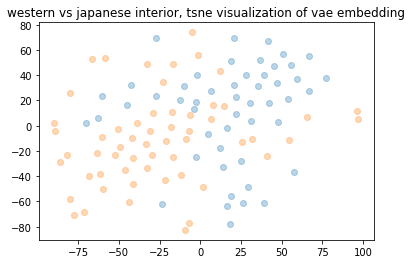

silhouette score: 0.06060815449632431


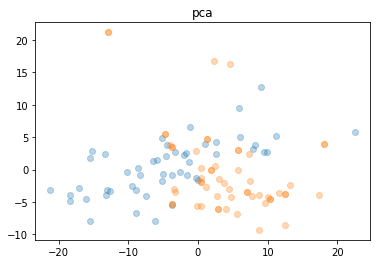

In [151]:
get_embedding_vae(vae, np.vstack([western_interiors, japanese_interiors]), [0] * len(western_interiors) + [1] * len(japanese_interiors))

In [25]:
# extracted_embeddings = []
# def get_embedding_extractor(extractor, data, labels):
#     embeddings = []
#     i=1
#     for interior in data:
#         if i %100==1:
#             print(i)
#         i+=1
#         embeddings.append(extractor(tf.expand_dims(interior, axis=0))[0])
#     # Since the first step of TSNE is PCA anyways we know we have a relatively good dataset if the PCA result looks good
#     extracted_embeddings = embeddings
#     visualized = TSNE(n_components=2, n_iter=1000).fit_transform(embeddings)
#     plt.title("western vs japanese interior, tsne visualization of extractor embedding")
#     for label in np.unique(labels):
#         plt.scatter(visualized[labels==label][:,0], visualized[labels==label][:,1], label=label, alpha=0.3)
#     plt.show()
#     pca = PCA(n_components = 30)
#     pca_result = pca.fit_transform(embeddings)
    
#     #a better than 0 silhouette score is good that means we have a good separation (being close to decision boundary is fine)
#     ss = silhouette_score(pca_result, labels)
#     print("silhouette score: {}".format(ss))
#     plt.title("pca")
#     for label in np.unique(labels):
#         plt.scatter(pca_result[labels==label][:,0], pca_result[labels==label][:,1], label=label, alpha=0.3)
#     plt.show()
#     return embeddings

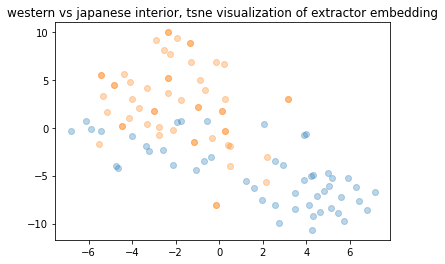

silhouette score: 0.14186472565356467


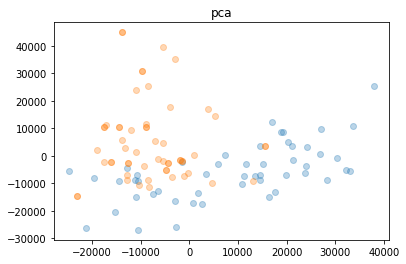

In [170]:
#takes decently longer 
get_embedding_extractor(extractor, np.vstack([western_interiors, japanese_interiors]), [0] * len(western_interiors) + [1] * len(japanese_interiors))

# Flicker Dataset
Here I just used the flickr api to get more images. I sorted out the bad ones by hand. At this point i'm pretty settled on using the style extractor. Basically japanese interior vs western interior (tatami vs modern)

Here are some code using the flickrapi for data collection. Note its more or less just an example since the full dataset that we used is collected locally and sorted out by hand before zipping it and uploading it to the google AI platform

In [120]:
import flickrapi
import urllib
from PIL import Image

# Flickr api access key 
flickr=flickrapi.FlickrAPI('e7095a3800069bad3777c75d463692d8', 'ff4b9185730214ca', cache=True)


keyword = "hokusai"

photos = flickr.walk(text=keyword,
                     tag_mode='all',
                     tags="painting",
                     extras='url_c',
                     per_page=100,           # may be you can try different numbers..
                     sort='relevance')

urls = []
for i, photo in enumerate(photos):
#     print (i)
    
    url = photo.get('url_c')
    urls.append(url)
    
    # get 50 urls
    if i > 500:
        
        break
print(len(urls))
a = 0
for i in range (len(urls)):
    print(i)
    if(urls[i] is not None):
        response = requests.get(urls[i], stream=True)
        with open('./content/hokusai/hokusai{}.jpg'.format(a), 'wb') as file:
            response.raw.decode_content = True
            shutil.copyfileobj(response.raw, file)
            del response
            a+=1

# Resize the image and overwrite it
# image = Image.open('00001.jpg') 
# image = image.resize((256, 256), Image.ANTIALIAS)
# image.save('00001.jpg')

502
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [128]:
data_dir_jap = "./content/hokusai"
batch_size = 100
img_height = IMAGE_SIZE
img_width = IMAGE_SIZE
hokusai = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_jap,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30 files belonging to 1 classes.


In [131]:
for image_batch, labels_batch in hokusai:
  hokusai = image_batch
  print(test_image.shape)
  # print(labels_batch.shape)
  break

hokusai = hokusai.numpy().astype('float32') / 255.

(30, 224, 224, 3)


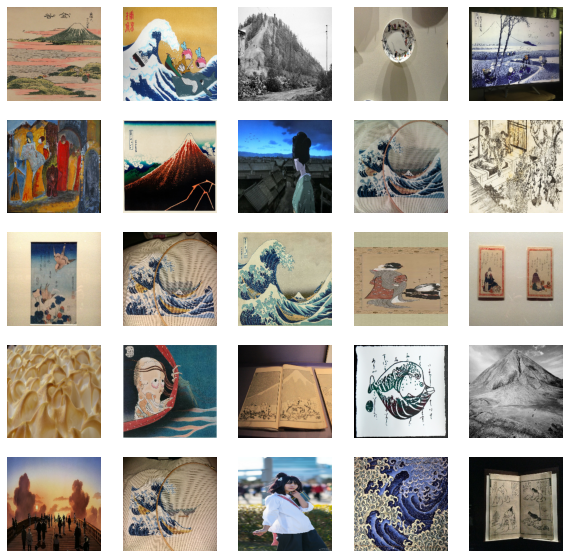

In [135]:
#did not bother to clean but i guess its good enoguh
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(hokusai[i])
  plt.axis("off")

In [40]:
import glob
batch_size = 32
img_height = IMAGE_SIZE
img_width = IMAGE_SIZE
tatami_files = glob.glob("./content/tatami/img/*.jpg")


In [41]:
def image_to_activations(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    activations = tf.keras.applications.vgg19.preprocess_input(img)
    return activations, image_path



In [42]:
activation_dataset = tf.data.Dataset.from_tensor_slices(list(tatami_files))


In [43]:
activation_dataset = activation_dataset.map(
  image_to_activations, 
  num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)

In [42]:
i = 0
# Save all activations to disk in NumPy format, doing this because of the large dimensions of extracted features and gets very time consuming if not
# dw this will get projected down via
# johnson lindenstrauss
for img_batch, path_batch in activation_dataset:
    print(i)
    i+=1
    batch_features = extractor(img_batch)
    for bf, p in zip(batch_features, path_batch):
        path_of_feature = p.numpy().decode("utf-8")
        np.save(path_of_feature, bf.numpy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [44]:
modern_files = glob.glob("./content/modern/img/*.jpg")

In [46]:
activation_dataset = tf.data.Dataset.from_tensor_slices(list(modern_files))
activation_dataset = activation_dataset.map(
  image_to_activations, 
  num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)
i = 0
# Save all activations to disk in NumPy format
for img_batch, path_batch in activation_dataset:
    print(i)
    i+=1
    batch_features = extractor(img_batch)
    for bf, p in zip(batch_features, path_batch):
        path_of_feature = p.numpy().decode("utf-8")
        np.save(path_of_feature, bf.numpy())  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [91]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.manifold import TSNE
from os import path

In [45]:
# initialize random projection matrix
grp = GaussianRandomProjection(n_components=500).fit(np.zeros((1000, extractor.layers[-1].output_shape[0][1])))

In [46]:
embedded_modern = []
for path in modern_files:
    activation = np.load(path+".npy")
    embedded_modern.append(grp.transform(activation.reshape(1,-1)))

In [47]:
embedded_tatami = []
for path in tatami_files:
    activation = np.load(path+".npy")
    embedded_tatami.append(grp.transform(activation.reshape(1,-1)))

In [111]:
modern_images = []
for path in modern_files:
    im = Image.open(path).resize((100,100)).convert('RGB')
    modern_images.append(np.array(im))

In [112]:
tatami_images = []
for path in tatami_files:
    im = Image.open(path).resize((100,100)).convert('RGB')
    tatami_images.append(np.array(im))

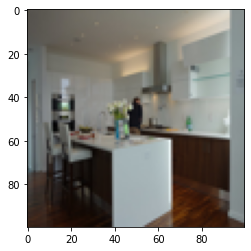

In [113]:
plt.imshow(modern_images[0])

# Here i am trying to use get the embedded data into a format that i can use tensorboard to visualize

In [114]:
to_visualise = np.array(modern_images + tatami_images)

In [115]:
img_h = to_visualise.shape[1]
img_w = to_visualise.shape[2]
img_c = to_visualise.shape[3]
n_plots = int(np.ceil(np.sqrt(to_visualise.shape[0])))
# create big sprite template
sprite_image = np.ones((img_h * n_plots ,img_w * n_plots, img_c))
print(sprite_image.shape)
# fill the sprite templates with the handwritten digits
for i in range(n_plots):
    for j in range(n_plots):
        this_filter = i * n_plots + j
        if this_filter < to_visualise.shape[0]:
            this_img = to_visualise[this_filter]
            sprite_image[i * img_h:(i + 1) * img_h,
              j * img_w:(j + 1) * img_w,:] = this_img

(3900, 3900, 3)


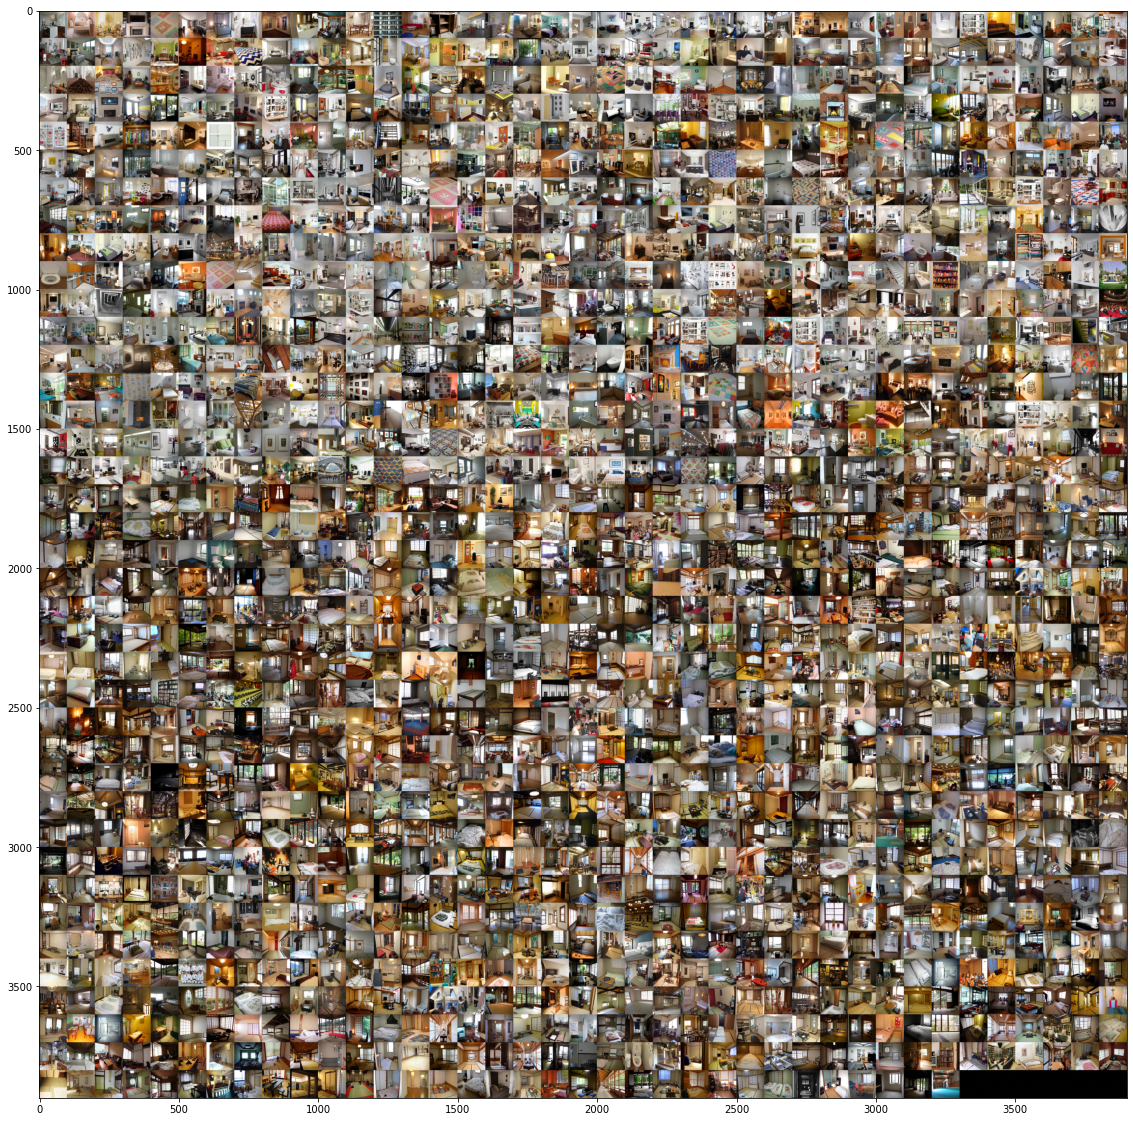

In [138]:
plt.figure(figsize=(20,20))
plt.imshow(sprite_image/255)

In [119]:
plt.imsave("sprite_image.png",sprite_image/255)


TypeError: imsave() got an unexpected keyword argument 'alpha'

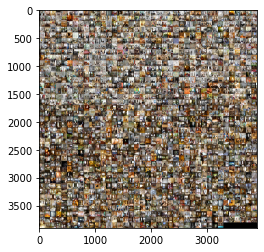

In [136]:
plt.imshow(sprite_image/255)

In [123]:
img.save("sprite_image_large_not_transparent.jpg", transparency=0)

# visualized using tensorboard
The good thing about tensorboard is that you can have a 3d visualization rather than a 2d, and you can click on iamges and see which points are the closest neighbors and easily see if it is roughly working or not

In [2]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "./tensor_board_vis.png")

# Here is embedded dataset projected to 3d via tsne 
As you can see that there are dense pockets blue and red. We are not looking for distinct clusters as our hypothesis is that styles vary continuously. As long similar styles gets close together, we are happy

In [142]:
Image(url= "./labeled_projection.png")

In [48]:
labels = [0] * len(embedded_modern) + [1] * len(embedded_tatami)

In [88]:
johnson_lindenstrauss_min_dim(n_samples = 1000, eps=0.5)

331

In [49]:
all_embedded = embedded_modern + embedded_tatami

In [50]:
all_embedded = np.array(all_embedded)

In [51]:
all_embedded = all_embedded.squeeze()

In [56]:
visualized = TSNE(n_components=2).fit_transform(all_embedded)

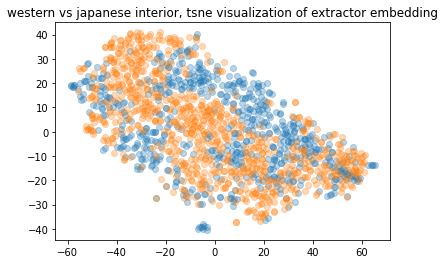

In [57]:
plt.title("western vs japanese interior, tsne visualization of extractor embedding")
for label in np.unique(labels):
    plt.scatter(visualized[labels==label][:,0], visualized[labels==label][:,1], label=label, alpha=0.3)
plt.show()

Doesn't look too bad, again, we are looking for the fact that there should be pockets of one class or the other but does not have to be fully separated clusters as style varies from class to class smoothly.

# Model building ends here, analysis continues with main notebook so you may stop reading here
this notebook is just for making the models and check to see that they output the right outputs and doing some quick and dirty check to see if the models might work or not. Go over to main report to see evidence of more rigorous testing. All results were already reported at the top of this notebook (room-to-room-obj-to-obj will work the best) but the style extractor also doesn't do too bad of a job.

## All code underneath were for testing and are not really organized in anyway, just here for reference purposes

In [33]:
# Code commented out since they were previous ran
# data_dir = "./content/modern"

# img_height = IMAGE_SIZE
# img_width = IMAGE_SIZE
# modern_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   seed=0,
#   image_size=(img_height, img_width), batch_size=1
# )

Found 657 files belonging to 1 classes.


In [34]:
# from PIL import Image
# import os
# import glob
# import numpy as np

In [35]:
# files = glob.glob('./content/modern/img/*.jpg')


In [36]:
# modern_ds = [np.array(Image.open(fname).resize((IMAGE_SIZE, IMAGE_SIZE))) for fname in files]

In [37]:
# modern_ds_ = []
# for im in modern_ds:
#     if(im.shape==(224,224,3)):
#         modern_ds_.append(im)


In [38]:
# modern_ds = np.array(modern_ds_)

In [39]:
# modern_ds.shape

(647, 224, 224, 3)

In [40]:
# modern_ds = modern_ds/np.max(modern_ds)

In [41]:
# np.max(modern_ds[10])

1.0

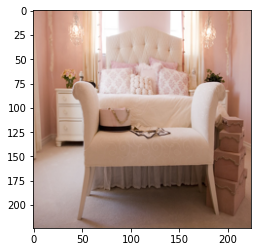

In [42]:
# plt.imshow(modern_ds[1])

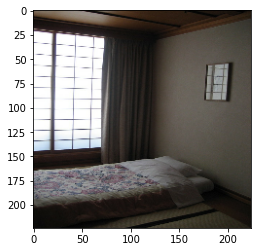

In [43]:
# plt.imshow(tatami_ds[2])

In [45]:
full_interior_labels = [0]*len(modern_ds) + [1] * len(tatami_ds)

In [ ]:
full_interior_ds = np.vstack([modern_ds,tatami_ds])

In [46]:
extractor_embeddings = get_embedding_extractor(extractor, full_interior_ds, full_interior_labels)

1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501


MemoryError: Unable to allocate 6.88 GiB for an array with shape (1513, 610304) and data type float64

In [49]:
embeddings = []
i=1
for interior in full_interior_ds:
    if i %100==1:
        print(i)
    i+=1
    embeddings.append(extractor(tf.expand_dims(interior, axis=0))[0])

1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501


Checking the latent space of vae embedding

In [148]:
get_embedding_vae(vae, full_interior_ds, full_interior_labels)

NameError: name 'full_interior_ds' is not defined

In [255]:
url_front = "https://www.pinterest.ca/eiwadesign/japanese-lighting-for-traditional-interior"
# url_end = "&phrase=living%20room&sort=mostpopular"
Jap_image_info = []
# for i in range(10):
url = url_front  +str(i)+url_end
response = requests.get(url_front)

soup = BeautifulSoup(response.text, "html.parser")

aas = soup.find_all("amp-img", class_='_1xgacdm')
# print(aas)
for a in aas:
    # image_tag = a.findChildren("img")
    # print(a["src"])
    # print(image_tag[0]['src'])
    Jap_image_info.append(a["src"])

print(len(Jap_image_info))

0


In [85]:
from PIL import Image

In [86]:
im = np.array(Image.open('./noguchi.jpg'))

In [87]:
im = im/255

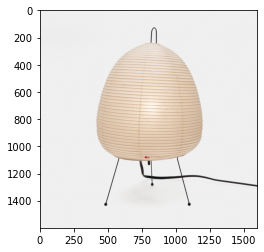

In [88]:
plt.imshow(im)

In [89]:
resized = tf.image.resize(im,(IMAGE_SIZE, IMAGE_SIZE))

In [90]:
embedded_cord = vae.encoder(tf.expand_dims(resized,axis=0))[2].numpy()

In [91]:
dist_arr = all_embedding - embedded_cord

In [92]:
dist_arr = np.linalg.norm(dist_arr, axis=1)

In [93]:
dist_arr.shape

(107,)

In [94]:
smallest_idx =  dist_arr.argsort()[:10]

In [95]:
all_interiors = np.vstack([western_interiors, japanese_interiors])

In [96]:
all_interiors.shape

(107, 224, 224, 3)

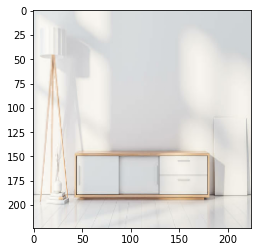

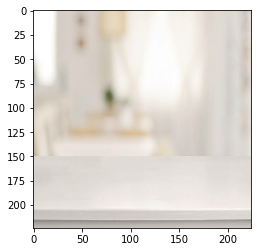

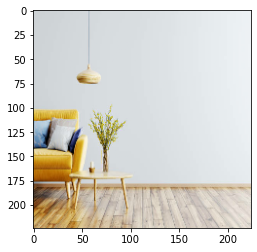

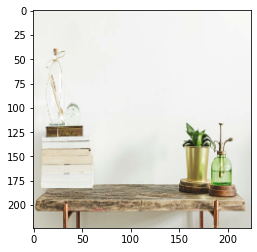

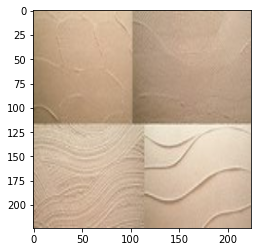

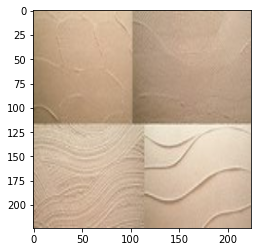

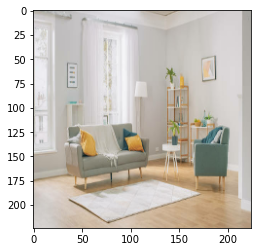

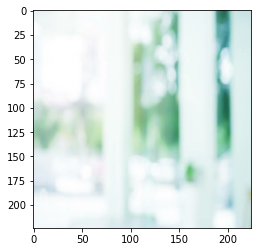

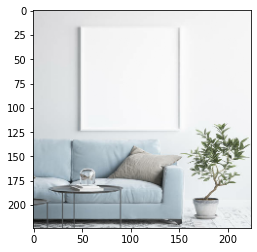

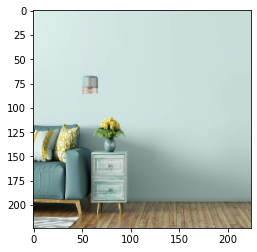

In [97]:
for idx in smallest_idx:
    plt.figure()
    plt.imshow(all_interiors[idx])

In [98]:
style_outputs = style_extractor(tf.expand_dims(resized, axis=0))

In [99]:
style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

In [100]:
flattened = []
for output in style_outputs:
    flattened.append(tf.keras.backend.flatten(output).numpy())

In [101]:
embedded_cord = np.hstack(flattened)

In [102]:
all_interiors = np.vstack([western_interiors, japanese_interiors])
embedded_all_interiors = []
for w_interior in all_interiors:
    style_outputs = style_extractor(tf.expand_dims(w_interior, axis=0))
    style_outputs = [gram_matrix(style_output) for style_output in style_outputs]
    flattened = []
    for output in style_outputs:
        flattened.append(tf.keras.backend.flatten(output).numpy())
    embedded_all_interiors.append(np.hstack(flattened))
    

In [103]:
embedded_all_interiors = np.array(embedded_all_interiors)

In [104]:
embedded_all_interiors.shape

(107, 610304)

In [113]:
visualized = TSNE(n_components=2, n_iter=1000).fit_transform(embedded_all_interiors)

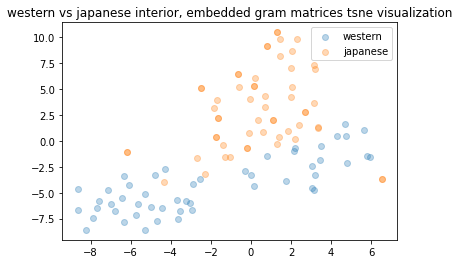

In [115]:
plt.title("western vs japanese interior, embedded gram matrices tsne visualization")
plt.scatter(visualized[labels==0][:,0], visualized[labels==0][:,1], label="western", alpha=0.3)
plt.scatter(visualized[labels==1][:,0], visualized[labels==1][:,1], label="japanese", alpha = 0.3)
plt.legend()

# What we learned so far
- Autoencoders work meh
- DC-VAE work slightly better
- Vanilla Gram Matrix representation from the style layers of VGG16 seems to work best (Japanese vs western interiors are separated out quite well when visualized using TSNE), though the dimension of the encoding is kinda huge, maybe can try autoencoder or PCA it down to lower dimensions


In [614]:
dist_arr = embedded_all_interiors - embedded_cord

In [615]:
dist_arr = np.linalg.norm(dist_arr, axis=1)

In [616]:
dist_arr.shape

(107,)

In [617]:
smallest_idx =  dist_arr.argsort()[:10]

In [618]:
all_interiors.shape

(107, 224, 224, 3)

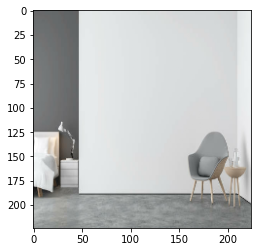

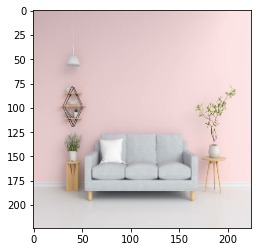

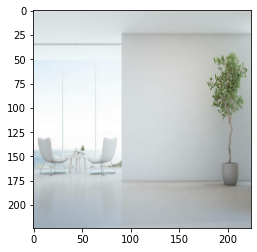

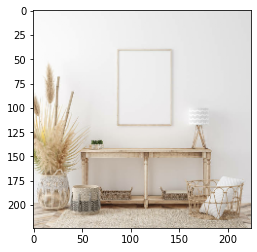

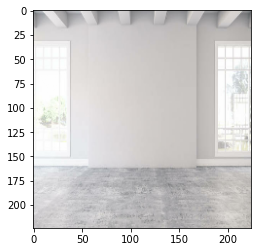

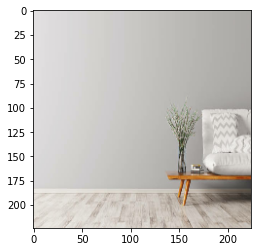

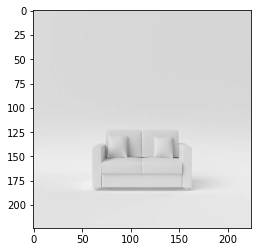

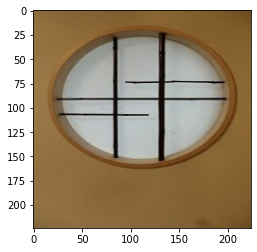

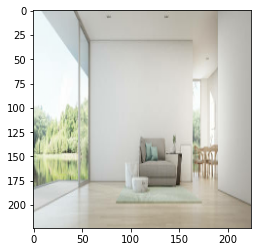

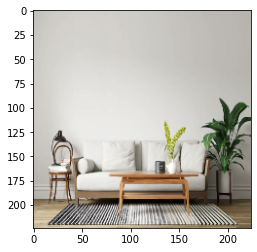

In [619]:
for idx in smallest_idx:
    plt.figure()
    plt.imshow(all_interiors[idx])

In [1]:
!pip install flickrapi

     |████████████████████████████████| 54 kB 4.3 MB/s  eta 0:00:01


In [60]:
all_embedded

(1515, 500)

In [61]:
np.save("all_embedded", all_embedded)

In [62]:
np.save("all_embedded_labels", labels)